In [ ]:
# KAGGLE LINKING
#Code to run in Colab without downloading the dataset
!pip install --upgrade kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# DATASET LOADING
#Code to run in Colab
!kaggle datasets download -d ananthu017/emotion-detection-fer
#Code to run in Colab
!unzip /content/emotion-detection-fer

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/im37.png      
  inflating: train/sad/im370.png     
  inflating: train/sad/im3700.png    
  inflating: train/sad/im3701.png    
  inflating: train/sad/im3702.png    
  inflating: train/sad/im3703.png    
  inflating: train/sad/im3704.png    
  inflating: train/sad/im3705.png    
  inflating: train/sad/im3706.png    
  inflating: train/sad/im3707.png    
  inflating: train/sad/im3708.png    
  inflating: train/sad/im3709.png    
  inflating: train/sad/im371.png     
  inflating: train/sad/im3710.png    
  inflating: train/sad/im3711.png    
  inflating: train/sad/im3712.png    
  inflating: train/sad/im3713.png    
  inflating: train/sad/im3714.png    
  inflating: train/sad/im3715.png    
  inflating: train/sad/im3716.png    
  inflating: train/sad/im3717.png    
  inflating: train/sad/im3718.png    
  inflating: train/sad/im3719.png    
  inflating: train/sad/im372.png     
  inflating: train/sad/im3720.png    

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import random

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing import image

from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Dropout, MaxPooling2D, MaxPool2D, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from keras import regularizers

['angry', 'happy', 'neutral', 'surprised', 'sad', 'fearful', 'disgusted']
Num of class: 7


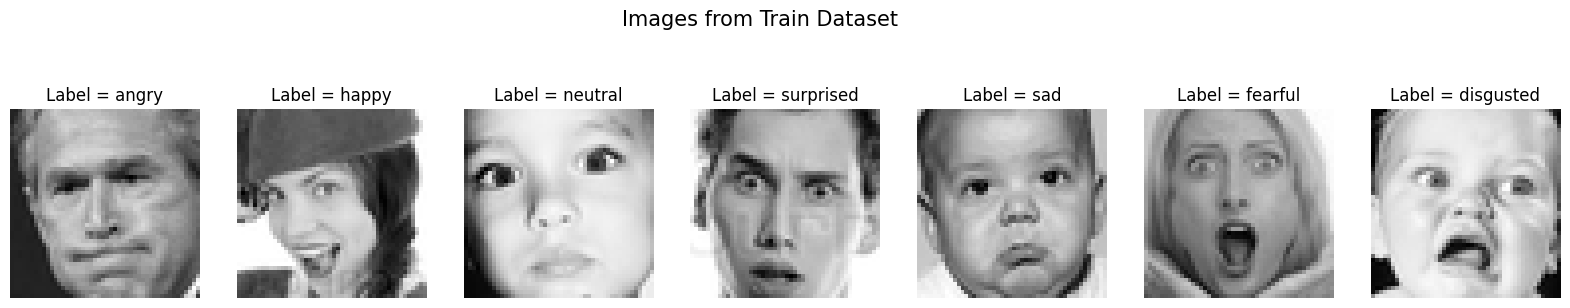

In [ ]:
# DATA EVLALUATION

train_dir = './train/'
test_dir = './test/'

img_size = 48
batch_size = 64
seed = 15
epochs = 20
num_classes = 0

class_labels = []

for num_classes, label in enumerate(os.listdir(train_dir)):
    num_classes += 1
    class_labels.append(label)

print(class_labels)
print(f"Num of class: {num_classes}")

# DATA VISUALIZATION

fig, axes = plt.subplots(1, 7, figsize=(20, 4))
fig.suptitle('Images from Train Dataset', fontsize=15)

axes = axes.flatten()

for i, label in enumerate(os.listdir(train_dir)):
    if i == len(axes):
        break

    label_path = os.path.join(train_dir, label)

    if os.path.isdir(label_path):
        img_file = [f for f in os.listdir(label_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        if img_file:
            random_img = random.choice(img_file)

            img_path = os.path.join(label_path, random_img)

            img = mpimg.imread(img_path)

            axes[i].imshow(img, cmap='gray')
            axes[i].set_title(f"Label = {label}")
            axes[i].axis('off')

plt.show()

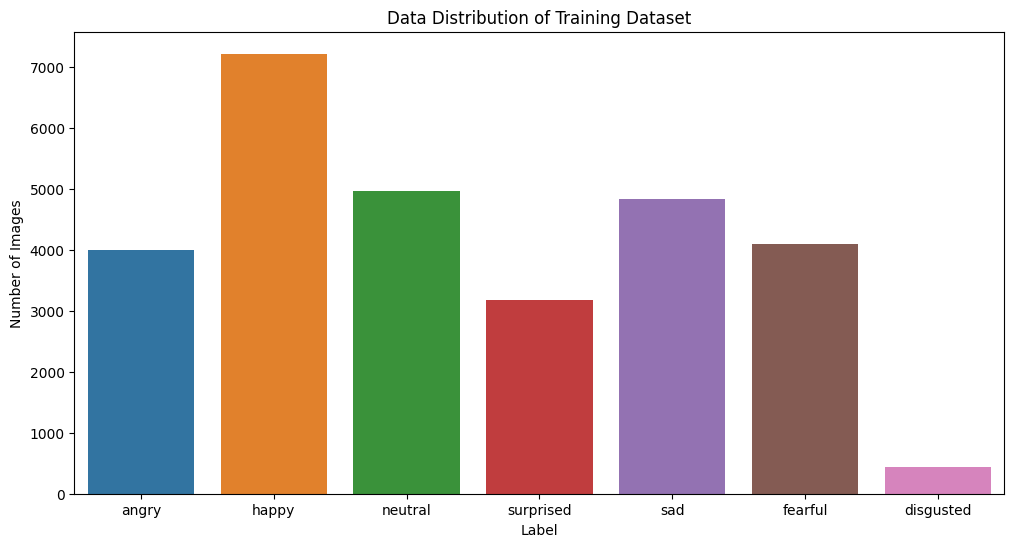

In [ ]:
# CLASS DISTRIBUTION

label_cnt = {}

for label in class_labels:
    label_path = os.path.join(train_dir, label)
    num_img = len([f for f in os.listdir(label_path)])
    label_cnt[label] = num_img

plt.figure(figsize=(12, 6))
sns.barplot(x=list(label_cnt.keys()), y=list(label_cnt.values()))
plt.title('Data Distribution of Training Dataset')
plt.xlabel('Label')
plt.ylabel('Number of Images')
plt.show()

In [ ]:
# PRE-PROCESSING

# Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="training"
)

validation_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="validation"
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [ ]:
# MODEL

model = Sequential([
    Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_42 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_42 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_33 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization_43 (Ba  (None, 24, 24, 128)     

In [ ]:
# TRAINING

history = model.fit(x=train_generator, epochs=50, validation_data=validation_generator)

Epoch 1/50
359/359 [==============================] - 30s 73ms/step - loss: 2.0874 - accuracy: 0.2831 - val_loss: 2.2302 - val_accuracy: 0.2663
Epoch 2/50
359/359 [==============================] - 26s 72ms/step - loss: 1.6225 - accuracy: 0.3806 - val_loss: 1.6751 - val_accuracy: 0.3780
Epoch 3/50
359/359 [==============================] - 26s 73ms/step - loss: 1.4483 - accuracy: 0.4413 - val_loss: 1.4802 - val_accuracy: 0.4346
Epoch 4/50
359/359 [==============================] - 26s 73ms/step - loss: 1.3744 - accuracy: 0.4771 - val_loss: 1.3658 - val_accuracy: 0.4813
Epoch 5/50
359/359 [==============================] - 26s 73ms/step - loss: 1.3265 - accuracy: 0.4917 - val_loss: 1.3454 - val_accuracy: 0.4978
Epoch 6/50
359/359 [==============================] - 26s 73ms/step - loss: 1.2984 - accuracy: 0.5066 - val_loss: 1.2864 - val_accuracy: 0.5145
Epoch 7/50
359/359 [==============================] - 26s 72ms/step - loss: 1.2669 - accuracy: 0.5175 - val_loss: 1.5124 - val_accuracy:

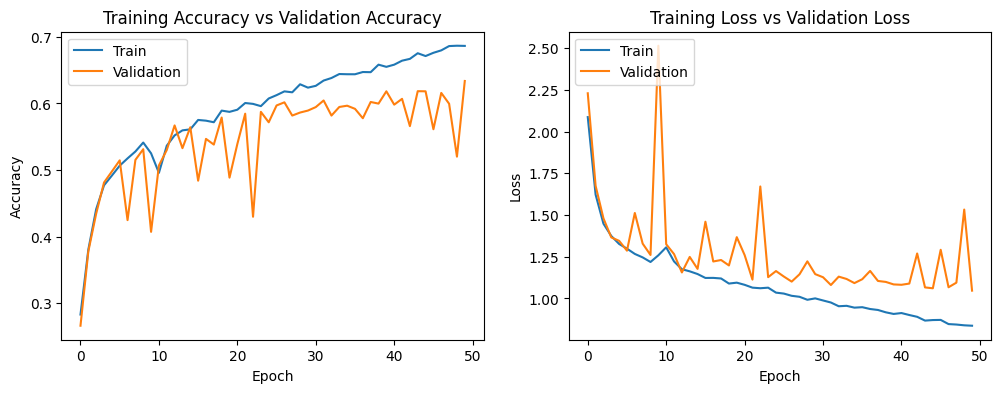

In [ ]:
# TRAINING RESULTS

fig, ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

1/1 [==============================] - 0s 121ms/step
Happy


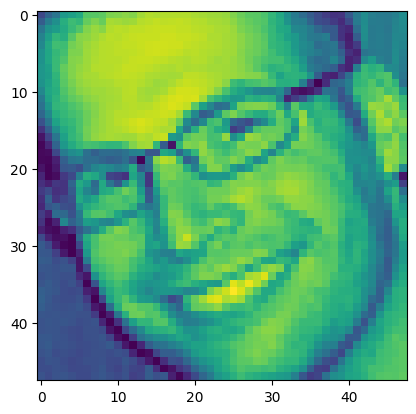

In [ ]:
# TESTING

label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

img = image.load_img("./test/happy/im1009.png",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)

img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])

img_index = result.index(max(result))
print(label_dict[img_index])

In [ ]:
# MODEL EVALUATION

train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc = model.evaluate(validation_generator)
print("train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

90/90 [==============================] - 5s 52ms/step - loss: 1.0471 - accuracy: 0.6258
train accuracy = 78.48 , validation accuracy = 62.58


In [ ]:
# SAVE MODEL

model.save('model_emotion_detect.h5')
model.save_weights('model_weights_emo_detect.h5')